# Artificial „SU(3) quarks” in quantum dots
This notebook contain code for initialization: layout, Hamiltonian (from Layout), and diagonalization of Hamiltonian


In [1]:
# import necesary modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

Set necesary constants for initialization of layout and Hailtonian

In [6]:
layout_size_x = 2   # number of atoms in X axis
layout_size_y = 3   # number of atoms in Y axis

t = 1               # parameter of Hamiltonian

Functions for initialization layout and ploting it

In [10]:
def initialize_layout(layout_size_x, layout_size_y):
    Layout = np.zeros((layout_size_y, layout_size_x), dtype=int)
    k = 1
    for i in range(layout_size_x):
        for j in range(layout_size_y):
            Layout[j][i] = k
            k += 1
    return Layout

In [11]:
def plot_layout(Layout):
    x = Layout.shape[1]
    y = Layout.shape[0]
    X = np.arange(1, x+1, 1, dtype=int)
    fig, axs = plt.subplots(1, 1)

    for i in range(y):
        Y=[]
        for j in range(x):
            Y.append(i+1)
        axs.scatter(X, Y, c='blue', linewidths=10)
    axs.set_aspect('equal', 'box')
    formatter = mticker.ScalarFormatter()
    axs.xaxis.set_major_formatter(formatter)
    axs.xaxis.set_major_locator(mticker.FixedLocator([]))
    axs.yaxis.set_major_locator(mticker.FixedLocator([]))
    plt.show()

## Let's show how layout look like:

[[1 4]
 [2 5]
 [3 6]]


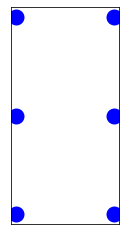

In [14]:
Layout = initialize_layout(layout_size_x, layout_size_y)
print(Layout)
plot_layout(Layout)

Function for initialization Hamiltonian fr0m layout

In [ ]:
def initialize_hamiltonian(Layout, t):
    elements = Layout.shape[0]*Layout.shape[1]
    layout_size_x = Layout.shape[0]
    layout_size_y = Layout.shape[1]
    Hamiltonian = np.zeros((elements,elements))

    for i in range(layout_size_x-1):
        for j in range(layout_size_y-1):
            line = Layout[i][j] - 1
            jump1 = Layout[i+1][j] - 1
            jump2 = Layout[i][j+1] - 1
            Hamiltonian[line][jump1] = -t
            Hamiltonian[line][jump2] = -t
            Hamiltonian[jump1][line] = -t
            Hamiltonian[jump2][line] = -t

    j = layout_size_y-1
    for i in range(layout_size_x-1):
        line = Layout[i][j] - 1
        jump1 = Layout[i+1][j] - 1
        Hamiltonian[line][jump1] = -t
        Hamiltonian[jump1][line] = -t

    i = layout_size_x-1
    for j in range(layout_size_y-1):
        line = Layout[i][j] - 1
        jump1 = Layout[i][j+1] - 1
        Hamiltonian[line][jump1] = -t
        Hamiltonian[jump1][line] = -t

    for i in range(elements):
        Hamiltonian[i][i] = 4*t

    return Hamiltonian

## Let's show how Hamiltonian look like:

In [ ]:
Hamiltonian = initialize_hamiltonian(Layout, t)
print(Hamiltonian)

[[ 4. -1. -1.  0.]
 [-1.  4.  0. -1.]
 [-1.  0.  4. -1.]
 [ 0. -1. -1.  4.]]


Function for diagonalization

In [ ]:
def diagonalize_hamiltonian(Hamiltonian):
    w,v =  np.linalg.eig(Hamiltonian)
    idx = w.argsort()
    w = w[idx]
    v = v[:,idx]
    diagonal = np.diag(w)
    print("\nwartosci wlasne:\n", w)
    print("\nwektory wlasne:\n", v)
    print('\nZdiagonalizowany Hamiltonian:\n', diagonal)
    return diagonal


## Let's show how Hamiltonian look like after diagonalization:

In [ ]:
diagonalizated_hamiltonain = diagonalize_hamiltonian(Hamiltonian)


wartosci wlasne:
 [2. 4. 4. 6.]

wektory wlasne:
 [[ 5.00000000e-01  0.00000000e+00  7.07106781e-01  5.00000000e-01]
 [ 5.00000000e-01 -7.07106781e-01 -7.40726924e-16 -5.00000000e-01]
 [ 5.00000000e-01  7.07106781e-01 -1.17093835e-16 -5.00000000e-01]
 [ 5.00000000e-01  6.66133815e-16 -7.07106781e-01  5.00000000e-01]]

Zdiagonalizowany Hamiltonian:
 [[2. 0. 0. 0.]
 [0. 4. 0. 0.]
 [0. 0. 4. 0.]
 [0. 0. 0. 6.]]
